# Analisis del problema

In [ ]:
Al observar el problema, veo un posible uso de este tipo de datos: ¿qué tan bien podemos predecir, mes a mes, el incumplimiento de nuestros clientes? En otras palabras, ¿qué tan bien funciona nuestro modelo si solo usamos los datos de los primeros 2 meses con respecto a cuando usamos 6 meses de historial de pagos?

Sin embargo, dado que tengo mucho camino por recorrer, me centraré en un problema más simple: ¿puedo predecir el valor predeterminado con un mes de anticipación?

El cuaderno está estructurado de la siguiente manera:

Primera exploración: solo para ver lo que tenemos.
Limpieza: es hora de elegir las etiquetas no documentadas
Ingeniería de características: hora de ser creativo
Resultado final y lecciones aprendidas
Hay un paso adicional: el aprendizaje automático a ciegas, porque con mi corta experiencia ya he encontrado algunos escollos en mi proceso y quiero compartirlos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Exploración de los datos

In [5]:
credit = pd.read_csv('default_of _credit_card_clients.csv', header =1)

In [7]:
credit.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [13]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
Variables
Hay 25 variables:

ID: ID de cada cliente
LIMIT_BAL: Cantidad de crédito otorgado en dólares NT (incluye crédito individual y familiar / complementario
SEXO: Género (1 = masculino, 2 = femenino)
EDUCACIÓN: (1 = escuela de posgrado, 2 = universidad, 3 = escuela secundaria, 4 = otros, 5 = desconocido, 6 = desconocido)
MATRIMONIO: Estado civil (1 = casado, 2 = soltero, 3 = otros)
EDAD: edad en años
PAY_0: Estado de reembolso en septiembre de 2005 (-1 = pago debidamente, 1 = retraso en el pago durante un mes, 2 = retraso en el pago durante dos meses, ... 8 = retraso en el pago durante ocho meses, 9 = retraso en el pago durante nueve meses y encima)
PAY_2: Estado de reembolso en agosto de 2005 (escala igual a la anterior)
PAY_3: Estado de reembolso en julio de 2005 (escala igual a la anterior)
PAY_4: Estado de reembolso en junio de 2005 (escala igual a la anterior)
PAY_5: Estado de reembolso en mayo de 2005 (escala igual a la anterior)
PAY_6: Estado de reembolso en abril de 2005 (escala igual a la anterior)
BILL_AMT1: Monto del estado de cuenta en septiembre de 2005 (dólar NT)
BILL_AMT2: Cantidad del estado de cuenta en agosto de 2005 (dólar NT)
BILL_AMT3: Cantidad de extracto de cuenta en julio de 2005 (dólar NT)
BILL_AMT4: Monto del estado de cuenta en junio de 2005 (dólar NT)
BILL_AMT5: Monto del estado de cuenta en mayo de 2005 (dólar NT)
BILL_AMT6: Cantidad del estado de cuenta en abril de 2005 (dólar NT)
PAY_AMT1: Monto del pago anterior en septiembre de 2005 (dólar NT)
PAY_AMT2: Monto del pago anterior en agosto de 2005 (dólar NT)
PAY_AMT3: Monto del pago anterior en julio de 2005 (NT dólar)
PAY_AMT4: Monto del pago anterior en junio de 2005 (dólar NT)
PAY_AMT5: Monto del pago anterior en mayo de 2005 (NT dólar)
PAY_AMT6: Monto del pago anterior en abril de 2005 (dólar NT)
default.payment.next.month: pago predeterminado (1 = sí, 0 = no)

In [16]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [28]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [17]:
# Categorical variables description
credit[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [ ]:
No missing data, but a few anomalous things:

EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.
MARRIAGE has a label 0 that is undocumented

In [18]:
# Payment delay description
credit[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
They all present an undocumented label -2. If 1,2,3, etc are the months of delay, 0 should be labeled 'pay duly' and every negative value should be seen as a 0. But we will get to that later

In [19]:
# Bill Statement description
credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [ ]:
Negative values can be interpreted as credit? Has to be investigated

In [20]:
#Previous Payment Description
credit[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [21]:
credit.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [ ]:
The range is very broad, Investigation required.

Two columns bother me because are poorly labeled.

In [23]:
credit = credit.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [26]:
# I am interested in having a general idea of the default probability
credit.def_pay.sum() / len(credit.def_pay)

0.2212

In [27]:
#Other ways of getting this kind of numbers (as a reference for newbies like myself)
print(credit.shape)
print(credit.shape[0])
print(credit.def_pay.count())
print(len(credit.axes[1]))

(30000, 25)
30000
30000
25


In [ ]:
Check missing data
Let's check if there is any missing data.

In [29]:
total = credit.isnull().sum().sort_values(ascending = False)
percent = (credit.isnull().sum()/credit.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,def_pay,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Data unbalance¶
Let's check data unbalance with respect with target value, i.e. default.payment.next.month.

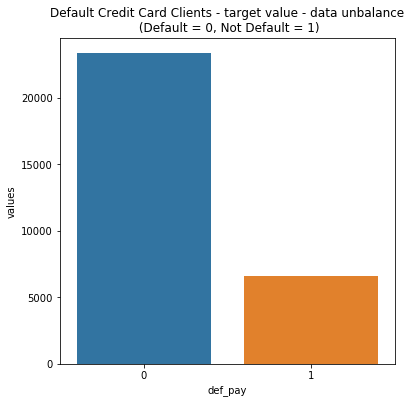

In [31]:
temp = credit["def_pay"].value_counts()
df = pd.DataFrame({'def_pay': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'def_pay', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [ ]:
Amount of credit limit

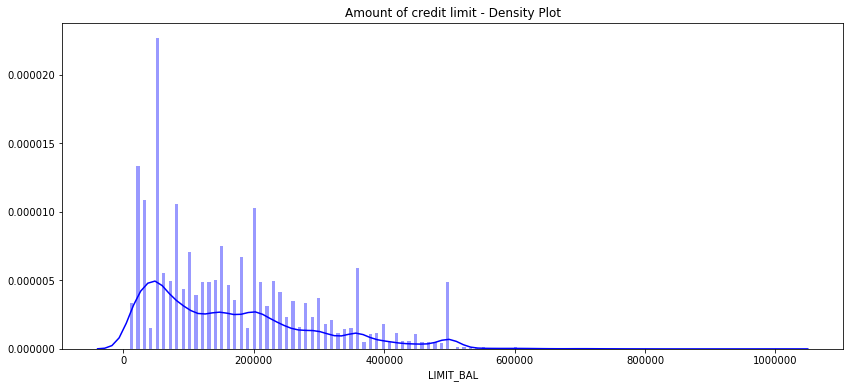

In [32]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(credit['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

In [ ]:
Amount of credit limit grouped by default payment next month
Let's visualize the density plot for amount of credit limit (LIMIT_BAL), grouped by default payment next month.

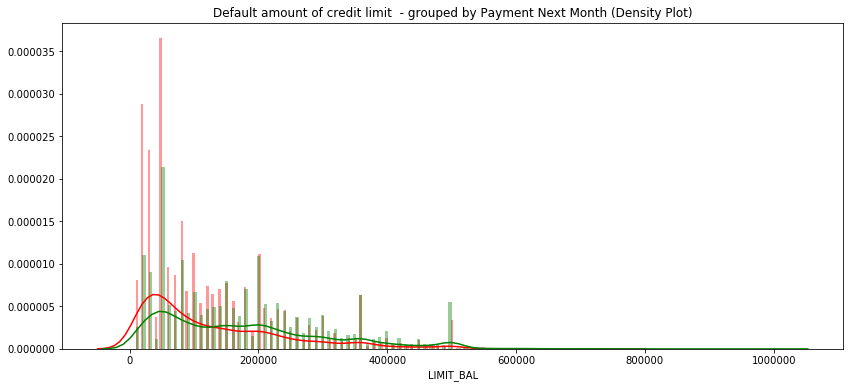

In [34]:
class_0 = credit.loc[credit['def_pay'] == 0]["LIMIT_BAL"]
class_1 = credit.loc[credit['def_pay'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

In [ ]:
Credit limit vs. sex¶
Let's check the credit limit distribution vs. sex. For the sex, 1 stands for male and 2 for female.

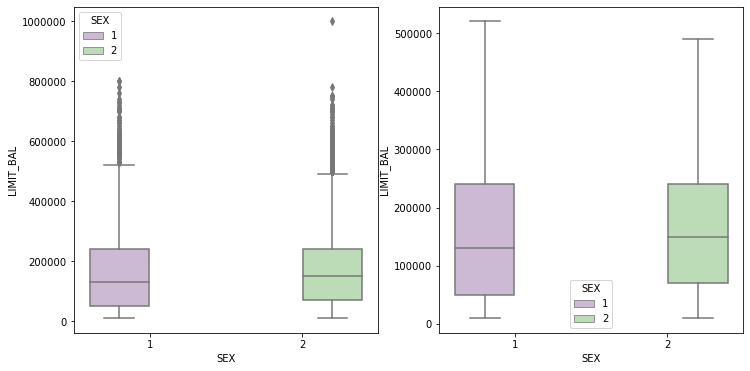

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=credit, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=credit, palette="PRGn",showfliers=False)
plt.show();

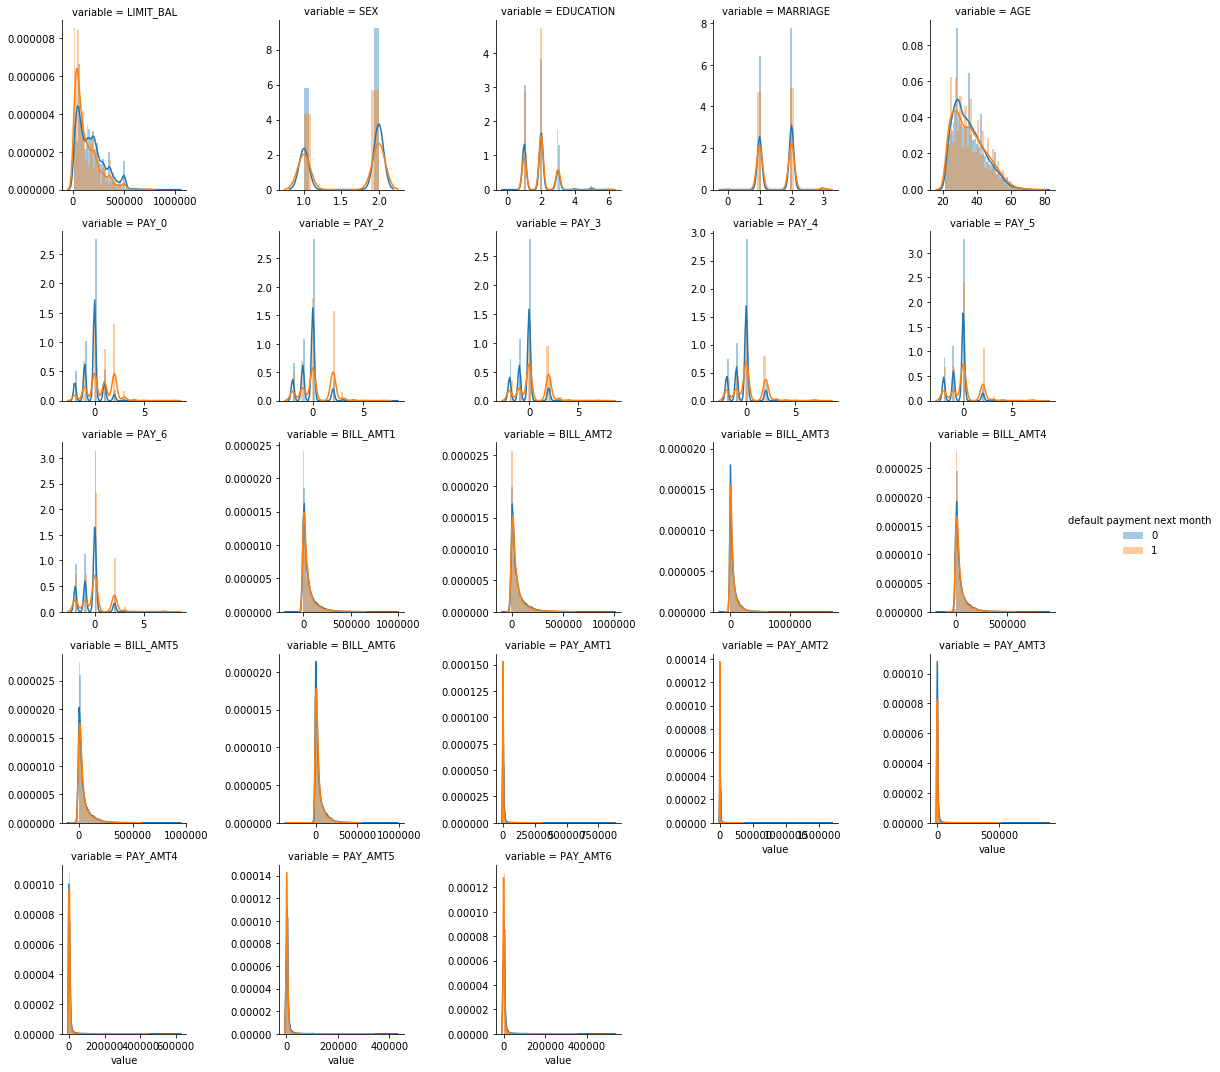

In [15]:
output = 'default payment next month'

# Let's do a little EDA
cols = [ f for f in credit.columns if credit.dtypes[ f ] != "object"]
cols.remove( "ID")
cols.remove( output )

f = pd.melt( credit, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

In [ ]:
Observations:

Defaults have a higher proportion of Lower LIMIT_BAL values
NonDefaults have a higher proportion of Females (Sex=2)
NonDefaults have a higher proportion of MoreEducated (EDUCATION=1 or 2)
NonDefaults have a higher proportion of Singles (MARRIAGE=2)
NonDefaults have a higher proportion of people 30-40years
NonDefaults have a MUCH higher proportion of zero or negative PAY_X variables (this means that being current or ahead of payments is associated with not defaulting in the following month). This is a strong relationship as the distribution are more separated - so we expect the PAY_X to be important!
(Clearly we're going to have to transform those dollar amounts in the PAY_AMTX and BILL_AMTX variables.)

How significant are these relationships? Given the observed data, is it possible we're imagining relationships when they're not really that strong?